# Detect object in image using yolo model

``pip install yolov5``



cours video: [cours-link](https://www.youtube.com/watch?v=tFNJGim3FXw&t=847s)

code frome GitHub [repo-link](https://github.com/nicknochnack/YOLO-Drowsiness-Detection/blob/main/Drowsiness%20Detection%20Tutorial.ipynb)

>**Note**<br><br>
- use ``conda env yolo`` (in my case)


1. Install and Import Dependencies

In [6]:
import torch
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Check CPU
x = torch.rand(5, 3)
print(x)

tensor([[0.7770, 0.5550, 0.5148],
        [0.8765, 0.0879, 0.4473],
        [0.0904, 0.7731, 0.9623],
        [0.0292, 0.2713, 0.7696],
        [0.6184, 0.5604, 0.6850]])


In [3]:
# Check GPU
torch.cuda.is_available()

True


2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\louis/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-16 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [14]:
# Print model
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

3. Make Detections with Images

In [3]:
img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [4]:
""" ! pip install fake-useragent """

Defaulting to user installation because normal site-packages is not writeable
  Using cached fake_useragent-1.5.1-py3-none-any.whl.metadata (15 kB)
Using cached fake_useragent-1.5.1-py3-none-any.whl (17 kB)


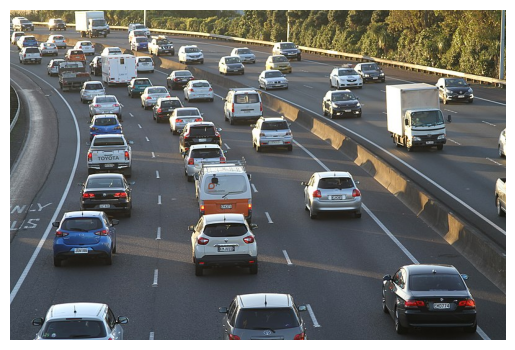

In [7]:
import requests
from PIL import Image
from fake_useragent import UserAgent

# Simulate a real browser's User-Agent 
ua = UserAgent()
headers = {'User-Agent': ua.random}

# Download the image
response = requests.get(img_url, headers=headers, stream=True)
response.raise_for_status()  # Check for download errors

# Load the image from the response
img = Image.open(response.raw)

# Display the image
plt.imshow(img)
plt.axis("off")
plt.show()

In [8]:
# Use model
results = model(img_url)
# Print result
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 504.9ms pre-process, 160.7ms inference, 224.5ms NMS per image at shape (1, 3, 448, 640)


> **Note** <br><br>
``np.squeeze`` is used to remove a single-dimensional entries. <br><br>
>__So (1, 533, 800, 3) will be (533, 800, 3).__ <br><br>
>We removed the image number in this case.

In [38]:
np.squeeze(results.render()).shape

(533, 800, 3)

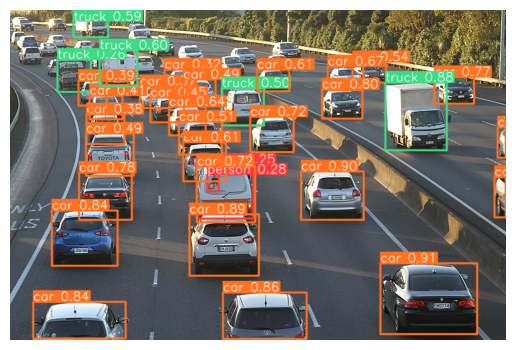

In [9]:
# Show image
plt.imshow(np.squeeze(results.render()))
plt.axis("off")
plt.show()

# Using webcame

In [21]:
cap = cv2.VideoCapture(0)
print('Press "q" to stop')


startTime = 0 
while cap.isOpened():
    currentTime = time.time()
    
    # Compute FPS and display the FPT
    fps = 1 / (currentTime - startTime) 
    startTime = currentTime
    
    
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    image = np.squeeze(results.render())
    
    cv2.putText(image, "FPS" + str(int(fps)), (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)
    cv2.imshow('YOLO', image)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Press "q" to stop


https://github.com/HumanSignal/labelImg

5. Train from scratch a yolov model

- Create dataset
- labelImg to create bounding box.


In [22]:
import os
import time

In [3]:
images_path = os.path.join('data', 'image')
labels = ["Mayo Scissors", "hand"]
number_imgs = 5

In [23]:
for label in labels:
    for img_num in range(number_imgs):
        imgname = os.path.join(images_path, label + '-' + str(img_num + 1) + '.jpg')
        print(imgname)
            

data\image\Mayo Scissors-1.jpg
data\image\Mayo Scissors-2.jpg
data\image\Mayo Scissors-3.jpg
data\image\Mayo Scissors-4.jpg
data\image\Mayo Scissors-5.jpg
data\image\hand-1.jpg
data\image\hand-2.jpg
data\image\hand-3.jpg
data\image\hand-4.jpg
data\image\hand-5.jpg


In [8]:
for label in labels:
    os.makedirs(os.path.join(images_path, label), exist_ok=True)

In [9]:

cap = cv2.VideoCapture(0)  # Start the webcam capture 

i = 0
label = labels[0]
print('Collecting images for {}'.format(label))
while cap.isOpened():  
    
    
    # the ``ret`` variable represents a boolean return value indicating whether the frame was successfully
    ret, frame = cap.read()

    cv2.imshow('Image Collection', frame)

    if cv2.waitKey(1) & 0xFF == ord('t'):  # Press 't' to take the frame
        i += 1
        # Naming out image path
        imgname = os.path.join(images_path, label, label + '-' + str(i) + '.jpg')  # Consider creating label subdirectories
        print(imgname)

        # Write out image to file 
        cv2.imwrite(imgname, frame)
        
        print(f"image: {label}-{str(i)} saved")
                
    if i == number_imgs:
        print(f"5 image saved for {label}")
        label = labels[1]
        print('Collecting images for {}'.format(label))
        
        
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break

cap.release()
cv2.destroyAllWindows()

data\image\Mayo Scissors\Mayo Scissors-1.jpg
image: Mayo Scissors-1 saved
data\image\Mayo Scissors\Mayo Scissors-2.jpg
image: Mayo Scissors-2 saved
data\image\Mayo Scissors\Mayo Scissors-3.jpg
image: Mayo Scissors-3 saved
data\image\Mayo Scissors\Mayo Scissors-4.jpg
image: Mayo Scissors-4 saved
data\image\Mayo Scissors\Mayo Scissors-5.jpg
image: Mayo Scissors-5 saved
5 image saved for Mayo Scissors
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand
5 image saved for hand


In [5]:
cap.release()
cv2.destroyAllWindows()

# launch labels image 
``canda activate yolo env ``
``labelImg ``

### Create ``dataset.yml`` file in yolov5 in GitHub repo



In [23]:
""" # Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128 # dataset root dir
train: images/train2017 # train images (relative to 'path') 128 images
val: images/train2017 # val images (relative to 'path') 128 images
test: # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush
 """

" # Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]\npath: ../datasets/coco128 # dataset root dir\ntrain: images/train2017 # train images (relative to 'path') 128 images\nval: images/train2017 # val images (relative to 'path') 128 images\ntest: # test images (optional)\n\n# Classes\nnames:\n  0: person\n  1: bicycle\n  2: car\n  3: motorcycle\n  4: airplane\n  5: bus\n  6: train\n  7: truck\n  8: boat\n  9: traffic light\n  10: fire hydrant\n  11: stop sign\n  12: parking meter\n  13: bench\n  14: bird\n  15: cat\n  16: dog\n  17: horse\n  18: sheep\n  19: cow\n  20: elephant\n  21: bear\n  22: zebra\n  23: giraffe\n  24: backpack\n  25: umbrella\n  26: handbag\n  27: tie\n  28: suitcase\n  29: frisbee\n  30: skis\n  31: snowboard\n  32: sports ball\n  33: kite\n  34: baseball bat\n  35: baseball glove\n  36: skateboard\n  37: surfboard\n  38: tennis racket\n  39: bottle\n  40: wine glass\n  41: cup\n  42: fork\n  4

### TRAIN MODEL UNSING CANDA CMD 

open conda env ``yolo``
1. ``cd yolov5``
2. ``python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2``


Where:
- ``python train.py``: This part executes the YOLOv5 training script (train.py) using the Python interpreter.
- ``--img 320``: Sets the image size for training to 320x320 pixels (as explained previously).
- ``--batch 16``: Specifies a batch size of 16, meaning 16 images will be processed together during each training iteration.
- ``--epochs 500``: Trains the model for 500 epochs (complete passes through the entire dataset).
- ``--data dataset.yml``: Points to a YAML configuration file named 'dataset.yml' that defines your dataset's location, classes, image paths, etc.
- ``--weights yolov5s.pt``: Uses pre-trained weights from the YOLOv5s model as a starting point for training. This is helpful for fine-tuning or transfer learning.
- ``--workers 2``: Specifies the use of 2 parallel processes for data loading to speed up training.
H

# Load Custom Model

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='costum train yolo model\weights\last.pt', force_reload=True)
model

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\louis/.cache\torch\hub\master.zip
YOLOv5  2024-4-16 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Try Custom Model by Loading an Image

>**Note**<br><br>
This model is trained only on 3 images so it accuracy will not be good. It just to try out how to train a yolo5 model and how to use LabelImg

In [14]:
img = "data\images\Mayo Scissors-5.jpg"

# Use model
results = model(img)
# Print result
results.print()

image 1/1: 480x640 1 person, 1 scissors
Speed: 6.0ms pre-process, 15.0ms inference, 76.0ms NMS per image at shape (1, 3, 480, 640)


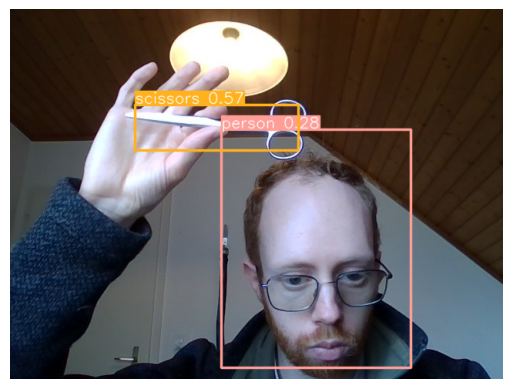

In [15]:
# Show image
plt.imshow(np.squeeze(results.render()))
plt.axis("off")
plt.show()

In [12]:
# try model is realy time
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()